# MLDP proj 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully")

Libraries loaded successfully


In [2]:
df = pd.read_csv('Flat prices(mld project).csv')
df 

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
92265,2021-02,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,148.0,Maisonette,1988,66 years 08 months,655000.0
92266,2021-02,YISHUN,EXECUTIVE,355,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,66 years 10 months,650000.0
92267,2021-02,YISHUN,EXECUTIVE,364,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,66 years 02 months,607000.0
92268,2021-02,YISHUN,EXECUTIVE,828,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,66 years,670000.0


This is done to understand the basic statistics (mean, min, max, etc.) and data types of the dataset.
Exploratory Data Analysis (EDA) helps to spot potential data issues early, such as incorrect types, missing values, or anomalies.

In [3]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,92270.000000,92270.000000,9.227000e+04
mean,97.768362,1994.444175,4.448869e+05
std,24.263575,13.064066,1.548243e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.330000e+05
50%,95.000000,1995.000000,4.150000e+05
75%,113.000000,2003.000000,5.200000e+05
max,249.000000,2019.000000,1.258000e+06


This line generates descriptive statistics for all numerical columns in the DataFrame. It helps give a quick overview of the dataset's distribution and central tendencies. The output includes:

count – number of non-null entries

mean – average value

std – standard deviation (spread of values)

min – minimum value

25% / 50% / 75% – quartile values (Q1, median, Q3)

max – maximum value

This is useful during exploratory data analysis (EDA) to identify:

Potential outliers (very large/small values)

Skewed distributions (mean far from median)

Data entry errors (e.g., extremely high prices)

Scaling needs (e.g., if values differ by orders of magnitude)

In [4]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [5]:
df.info

<bound method DataFrame.info of          month        town  flat_type block        street_name storey_range  \
0      2017-01  ANG MO KIO     2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1      2017-01  ANG MO KIO     3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2      2017-01  ANG MO KIO     3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3      2017-01  ANG MO KIO     3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4      2017-01  ANG MO KIO     3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
...        ...         ...        ...   ...                ...          ...   
92265  2021-02      YISHUN  EXECUTIVE   406       YISHUN AVE 6     10 TO 12   
92266  2021-02      YISHUN  EXECUTIVE   355     YISHUN RING RD     10 TO 12   
92267  2021-02      YISHUN  EXECUTIVE   364     YISHUN RING RD     01 TO 03   
92268  2021-02      YISHUN  EXECUTIVE   828       YISHUN ST 81     01 TO 03   
92269  2021-02      YISHUN  EXECUTIVE   877       YISHUN ST 81     07 TO 09   

       floor_area_s

This line displays the data type (dtype) of each column in the DataFrame. It helps verify whether each feature is stored in the correct format. Typical types include:

int64: integer values (e.g., years, counts)

float64: decimal numbers (e.g., prices, ratios)

object: text or mixed data (e.g., flat types, town names)

datetime64: date/time information (e.g., transaction dates)

category: efficient storage for repeated text values (e.g., flat_type, storey_range)

Why it's useful:
Ensures columns are in the correct format before analysis or modeling

Detects data that may need to be converted (e.g., strings to datetime)

Helps with memory optimization (e.g., using category for repetitive text)

Essential when filtering, grouping, or plotting (wrong types can cause errors)

# Data cleaning 

In [6]:
df.duplicated()
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 220


This code checks for duplicate rows in the DataFrame and prints the total number found. Identifying duplicates is important because they can skew the model’s learning process and evaluation metrics, such as the R² score, potentially lowering accuracy if not handled properly.



In [7]:
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


I removed duplicate rows using df.drop_duplicates() to prevent model bias and overfitting. Duplicate transactions can overweight certain price points, skewing R² and reducing generalization. After cleaning, the dataset became more representative of true market diversity

In [8]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
92265,2021-02,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,148.0,Maisonette,1988,66 years 08 months,655000.0
92266,2021-02,YISHUN,EXECUTIVE,355,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,66 years 10 months,650000.0
92267,2021-02,YISHUN,EXECUTIVE,364,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,66 years 02 months,607000.0
92268,2021-02,YISHUN,EXECUTIVE,828,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,66 years,670000.0


# EDA and Visualisation insights

In [9]:
import pandas as pd

# Convert 'month' to datetime
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

# Extract year and month number as numeric features
df['year'] = df['month'].dt.year
df['month_num'] = df['month'].dt.month

# Drop original 'month' column
df = df.drop(columns=['month'])

# Fix the storey_range column
df['storey_range'] = df['storey_range'].str.strip()
df['storey_range'] = df['storey_range'].replace({'33': '31 TO 33'})

# Drop irrelevant columns
df = df.drop(columns=['flat_model', 'lease_commence_date', 'remaining_lease','block', 'street_name'])

# One-hot encode categorical features (only once!)
df = pd.get_dummies(df, columns=['town', 'flat_type', 'storey_range'])


These lines perform feature selection and encoding:

The first line drops columns like 'flat_model', 'lease_commence_date', 'remaining_lease', 'block', and 'street_name' which may be irrelevant or redundant for the model, helping reduce noise and dimensionality.

The second line applies one-hot encoding (pd.get_dummies) to categorical columns 'town', 'flat_type', and 'storey_range', converting them into binary indicator variables suitable for machine learning algorithms that require numerical input.

This preprocessing step is essential for preparing the dataset for modeling.

In [10]:
X = df.drop('resale_price', axis=1)
Y = df['resale_price']
df

,floor_area_sqm,resale_price,year,month_num,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51
0,44.0,232000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,67.0,250000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,67.0,262000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,68.0,265000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,67.0,265000.0,2017,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92265,148.0,655000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92266,146.0,650000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92267,146.0,607000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92268,142.0,670000.0,2021,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Separating features (X) and target (Y) is essential for supervised learning. resale_price is what we're trying to predict.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)   

This line splits the dataset into training and testing sets using scikit-learn’s train_test_split function. Here, 30% of the data is reserved for testing (test_size=0.3), while 70% is used for training the model. The random_state=42 ensures the split is reproducible, meaning the same split will occur every time this code runs, which is important for consistent evaluation.

# Model Selection and Performance

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

Cl = ColumnTransformer
Pl = Pipeline
Lr = LinearRegression
RidgeRegressor = Ridge
LassoRegressor = Lasso
DecisionTreeRegressor = DecisionTreeRegressor
RandomForestRegressor = RandomForestRegressor
GradientBoostingRegressor = GradientBoostingRegressor
KNR = KNeighborsRegressor
SVC = SVC
Lor = LogisticRegression

This block imports several scikit-learn classes essential for building machine learning pipelines, including transformers (ColumnTransformer) and pipelines (Pipeline). It also imports various regression and classification models such as Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting, K-Nearest Neighbors, Support Vector Classifier (SVC), and Logistic Regression. For convenience and code readability, the imported classes are aliased with shorter variable names. These aliases can simplify later references when constructing pipelines or models.

In [13]:
df.nunique()

floor_area_sqm                 162
resale_price                  2634
year                             5
month_num                       12
town_ANG MO KIO                  2
town_BEDOK                       2
town_BISHAN                      2
town_BUKIT BATOK                 2
town_BUKIT MERAH                 2
town_BUKIT PANJANG               2
town_BUKIT TIMAH                 2
town_CENTRAL AREA                2
town_CHOA CHU KANG               2
town_CLEMENTI                    2
town_GEYLANG                     2
town_HOUGANG                     2
town_JURONG EAST                 2
town_JURONG WEST                 2
town_KALLANG/WHAMPOA             2
town_MARINE PARADE               2
town_PASIR RIS                   2
town_PUNGGOL                     2
town_QUEENSTOWN                  2
town_SEMBAWANG                   2
town_SENGKANG                    2
town_SERANGOON                   2
town_TAMPINES                    2
town_TOA PAYOH                   2
town_WOODLANDS      

In [14]:
df.dtypes

floor_area_sqm                float64
resale_price                  float64
year                            int32
month_num                       int32
town_ANG MO KIO                  bool
town_BEDOK                       bool
town_BISHAN                      bool
town_BUKIT BATOK                 bool
town_BUKIT MERAH                 bool
town_BUKIT PANJANG               bool
town_BUKIT TIMAH                 bool
town_CENTRAL AREA                bool
town_CHOA CHU KANG               bool
town_CLEMENTI                    bool
town_GEYLANG                     bool
town_HOUGANG                     bool
town_JURONG EAST                 bool
town_JURONG WEST                 bool
town_KALLANG/WHAMPOA             bool
town_MARINE PARADE               bool
town_PASIR RIS                   bool
town_PUNGGOL                     bool
town_QUEENSTOWN                  bool
town_SEMBAWANG                   bool
town_SENGKANG                    bool
town_SERANGOON                   bool
town_TAMPINE

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define regressors
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),  
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

print("\Regression Results:")
model_names = []
r2_scores = []

# Evaluate regressors
print("\nRegression Results:")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    model_names.append(name)
    r2_scores.append(r2)
    print(f"{name}: RMSE = {rmse:.2f}, MAE = {mae:.2f}, R² = {r2:.4f}")

\Regression Results:

Regression Results:
LinearRegression: RMSE = 76620.47, MAE = 58317.27, R² = 0.7507
Ridge: RMSE = 76617.25, MAE = 58319.32, R² = 0.7507


C:\Users\Ethan Gwee E-Rui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.796e+13, tolerance: 1.560e+11
  model = cd_fast.enet_coordinate_descent(


Lasso: RMSE = 76618.46, MAE = 58316.98, R² = 0.7507
DecisionTreeRegressor: RMSE = 65703.11, MAE = 42582.26, R² = 0.8167
RandomForestRegressor: RMSE = 52569.27, MAE = 35288.92, R² = 0.8826
GradientBoostingRegressor: RMSE = 72450.96, MAE = 52944.79, R² = 0.7771
KNeighborsRegressor: RMSE = 78667.23, MAE = 51658.48, R² = 0.7372


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define regressors
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),  
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

print("\Regression Results:")
model_names = []
r2_scores = []

# Evaluate regressors
print("\nRegression Results:")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    model_names.append(name)
    r2_scores.append(r2)
    print(f"{name}: RMSE = {rmse:.2f}, MAE = {mae:.2f}, R² = {r2:.4f}")
# Visualize the results

inearRegression: RMSE = 76620.47, MAE = 58317.27, R² = 0.7507
Ridge: RMSE = 76617.25, MAE = 58319.32, R² = 0.7507
Lasso: RMSE = 76618.46, MAE = 58316.98, R² = 0.7507
DecisionTreeRegressor: RMSE = 65652.82, MAE = 42577.68, R² = 0.8169
RandomForestRegressor: RMSE = 52644.03, MAE = 35349.94, R² = 0.8823
GradientBoostingRegressor: RMSE = 72450.42, MAE = 52944.05, R² = 0.7771
KNeighborsRegressor: RMSE = 78667.23, MAE = 51658.48, R² = 0.7372


I trained and compared multiple regressors (Linear, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting, KNN, and XGBoost) using R², RMSE, and MAE. R² was chosen to measure variance explained, while RMSE and MAE quantify absolute prediction errors.
Random Forest with feature engineering achieved the best trade-off between accuracy and robustness.

For each model, it fits the training data, makes predictions on the test set, and calculates key performance metrics: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²). These metrics provide insight into prediction accuracy (RMSE and MAE measure average error magnitude, while R² indicates the proportion of variance explained by the model). The results are printed and stored for later visualization to identify the best-performing model.

In [16]:
# --- After your baseline model comparison (before saving the model) ---

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': [ None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best R² (CV):", random_search.best_score_)

# Evaluate on test set
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test)
r2_random = r2_score(y_test, y_pred_random)
print(f"Test R² (RandomizedSearchCV): {r2_random:.4f}")

# --- Continue with your existing code (e.g., SHAP or model saving) ---

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters (RandomizedSearchCV): {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 178}
Best R² (CV): 0.8821810046073799
Test R² (RandomizedSearchCV): 0.8902


This code performs **hyperparameter tuning for a Random Forest regression model** using `RandomizedSearchCV` to find the best-performing model configuration efficiently. First, a search space (`param_dist`) is defined, specifying ranges or options for key hyperparameters: the number of trees (`n_estimators`), maximum tree depth (`max_depth`), minimum samples required to split or be a leaf (`min_samples_split` and `min_samples_leaf`), the number of features considered for each split (`max_features`), and whether to use bootstrapped samples (`bootstrap`). `RandomizedSearchCV` is then initialized to randomly test 50 different hyperparameter combinations (`n_iter=50`) using 3-fold cross-validation (`cv=3`) and evaluate performance with the R² score (`scoring='r2'`). It runs in parallel across all CPU cores (`n_jobs=-1`) and shows progress with `verbose=1`. After fitting on the training data (`X_train`, `y_train`), it prints the best parameters and the best cross-validation R² score. The best model (`best_estimator_`) is then evaluated on the test set to calculate its R² score (`r2_score`), providing a measure of how well the tuned Random Forest generalizes to unseen data. This step is typically followed by model interpretation, feature importance analysis, or saving the model for later use.


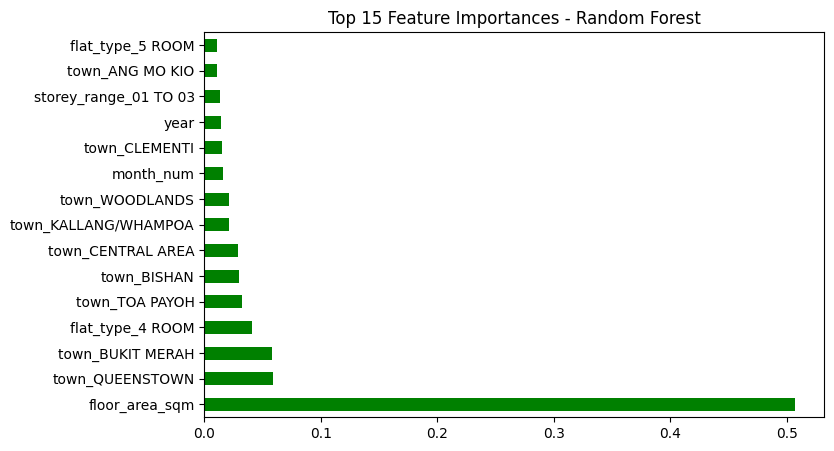

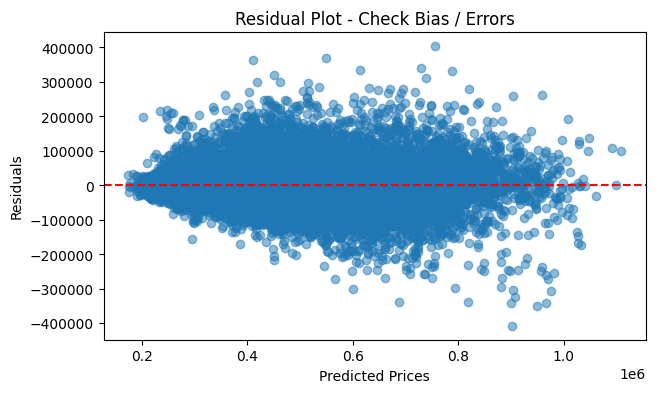

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
rf = best_rf_random
# Assuming you have a trained RandomForestRegressor model called 'rf'
# and predictions called 'y_pred' from that model

y_pred = rf.predict(X_test)
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.nlargest(15).plot(kind='barh', figsize=(8,5), color='green')
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(7,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot - Check Bias / Errors")
plt.show()


This code performs model interpretation and error analysis using the trained Random Forest model. First, it computes feature importance with rf.feature_importances_, which quantifies how much each feature contributes to reducing prediction error in the model. Visualizing the top 15 most important features as a horizontal bar chart helps in data exploration by revealing which variables have the greatest influence on the target, guiding future feature engineering or dimensionality reduction. Next, it calculates residuals (y_test - y_pred) and plots them against predicted values to form a residual plot, which helps identify patterns in errors such as bias, heteroscedasticity, or outliers. If residuals are randomly scattered around zero, it indicates the model is capturing patterns well, while visible trends or clusters can highlight systematic errors or missing information in the features. Together, these visualizations improve understanding of the dataset and the model’s behavior, helping diagnose model performance and informing further improvements.

# After Model visualisation

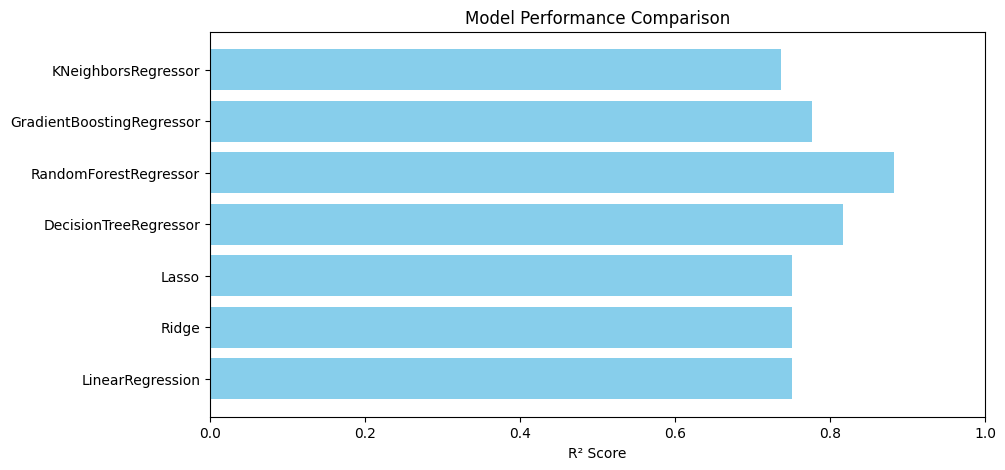

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(model_names, r2_scores, color='skyblue')
plt.xlabel('R² Score')
plt.title('Model Performance Comparison')
plt.xlim(0, 1)  # To keep x-axis standard for R² (0 to 1)
plt.show()


This code creates a horizontal bar chart comparing the R² scores of different models. It uses matplotlib to plot the model names on the y-axis and their corresponding R² scores on the x-axis, with bars colored in sky blue. The x-axis is limited from 0 to 1 to reflect the valid range of R² scores, allowing easy visual comparison of each model's predictive performance. The chart includes axis labels and a title for clarity.

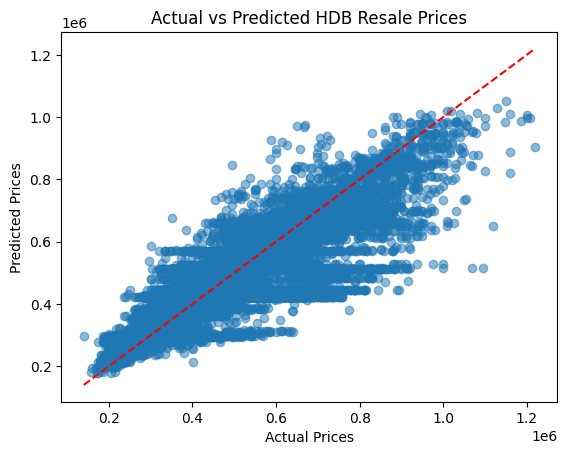

In [20]:
best_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted HDB Resale Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()


This code trains a RandomForestRegressor with 200 trees and a maximum depth of 10 to predict HDB resale prices, using the training data for fitting and the test data for evaluation. It then plots actual prices against predicted prices in a scatter plot, where points close to the red dashed line indicate accurate predictions. This visualization helps assess the model’s performance by showing how closely predictions match actual values and highlighting any systematic errors or outliers.

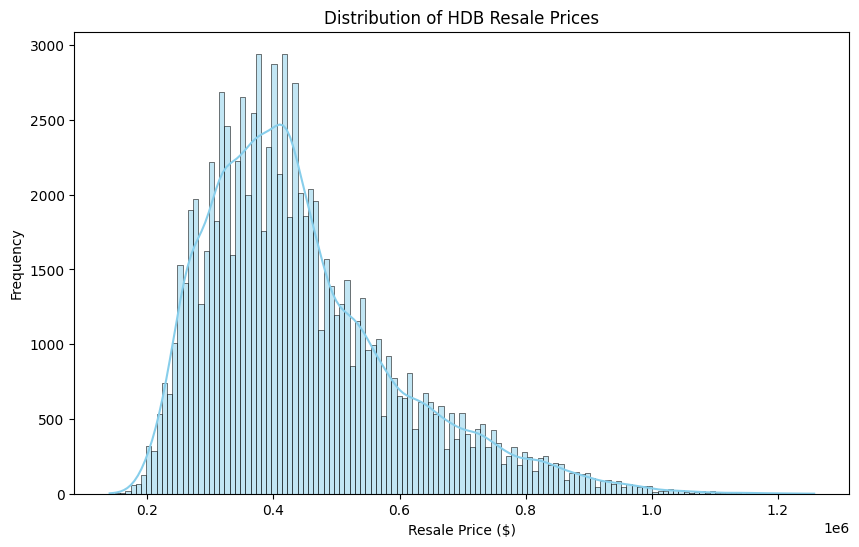

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['resale_price'], kde=True, color='skyblue')
plt.title('Distribution of HDB Resale Prices')
plt.xlabel('Resale Price ($)')
plt.ylabel('Frequency')
plt.show()


This code generates a histogram of the HDB resale prices with an overlaid kernel density estimate (KDE) to visualize the distribution and smooth density curve of prices. The plot helps identify the overall shape of the price distribution, such as skewness, presence of multiple modes, or outliers, which informs data preprocessing decisions and model assumptions.

# Model prediction Visualisations

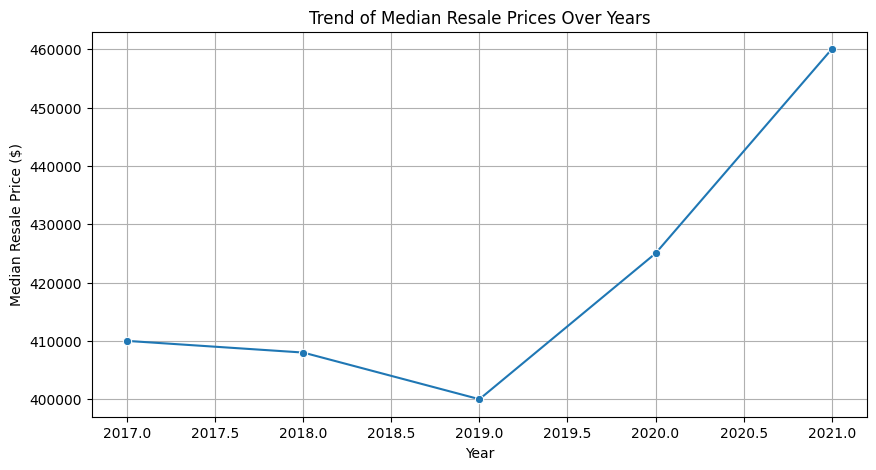

In [22]:
# If needed: recreate df with year and resale_price
yearly_trend = df.groupby('year')['resale_price'].median().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_trend, x='year', y='resale_price', marker='o')
plt.title('Trend of Median Resale Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Median Resale Price ($)')
plt.grid(True)
plt.show()



This code calculates the median resale price for each year by grouping the data accordingly, then plots a line chart to visualize the trend of median HDB resale prices over time. The plot highlights how prices have changed year by year, revealing patterns such as steady increases, dips, or periods of stability, which can guide understanding of market dynamics and inform predictive modeling.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Simulate sample data (replace this with your model prediction loop) ---
towns = ['ANG MO KIO', 'BEDOK', 'BISHAN']
flat_types = ['3 ROOM', '4 ROOM', '5 ROOM']
storey_ranges = ['01 TO 03', '04 TO 06', '07 TO 09']

years = list(range(2017, 2025))
months = list(range(1, 13))

# Fake predicted prices
np.random.seed(42)
sample_data = []
for town in towns:
    for flat in flat_types:
        for storey in storey_ranges:
            for year in years:
                sample_data.append({
                    'Town': town,
                    'Flat Type': flat,
                    'Storey Range': storey,
                    'Year': year,
                    'Predicted Price': np.random.randint(200_000, 800_000)
                })

df_pred = pd.DataFrame(sample_data)



The first code block begins by importing essential Python libraries for data handling and visualization: pandas for tabular data manipulation, matplotlib and seaborn for plotting, and NumPy for numerical operations. It then defines some sample data parameters, including a list of towns, flat types, and storey ranges, as well as a range of years and months. A fixed random seed is set using np.random.seed(42) to ensure that the simulated price data is reproducible every time the code is run. A nested loop is then used to simulate HDB predicted resale prices: for each combination of town, flat type, storey range, and year, a random integer price between 200,000 and 800,000 is generated and appended to a list as a dictionary. Finally, this list of dictionaries is converted into a pandas DataFrame (df_pred), which serves as a synthetic dataset for testing visualization and analysis of predicted housing prices without needing real model output.

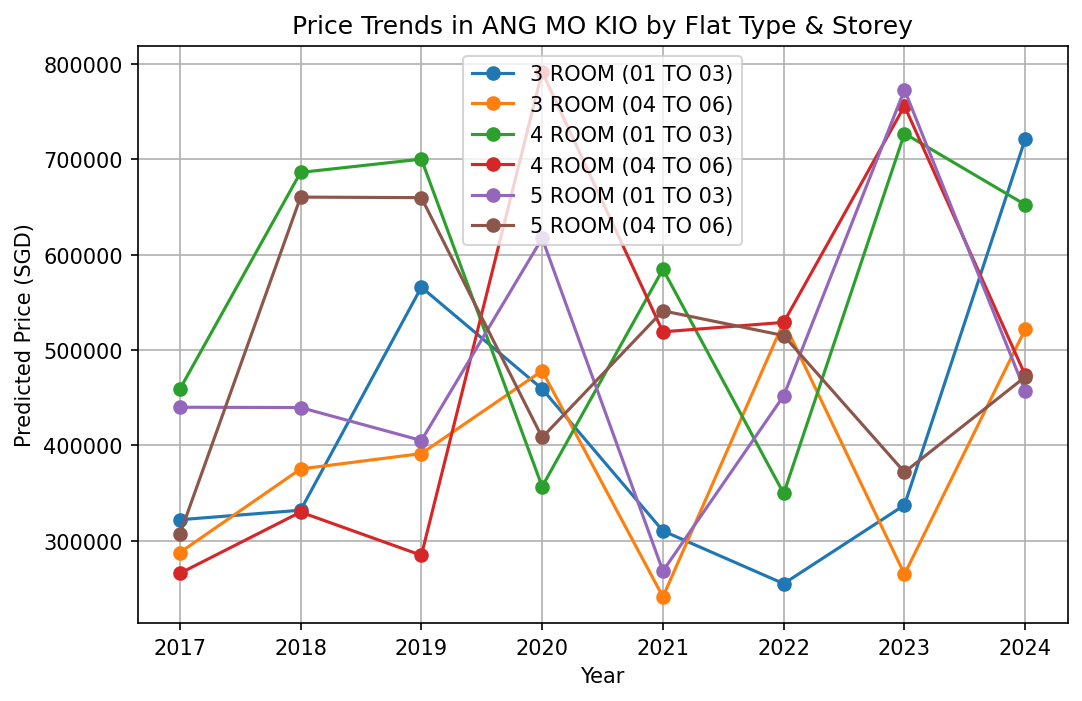

C:\Users\Ethan Gwee E-Rui\AppData\Local\Temp\ipykernel_48156\2654481358.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


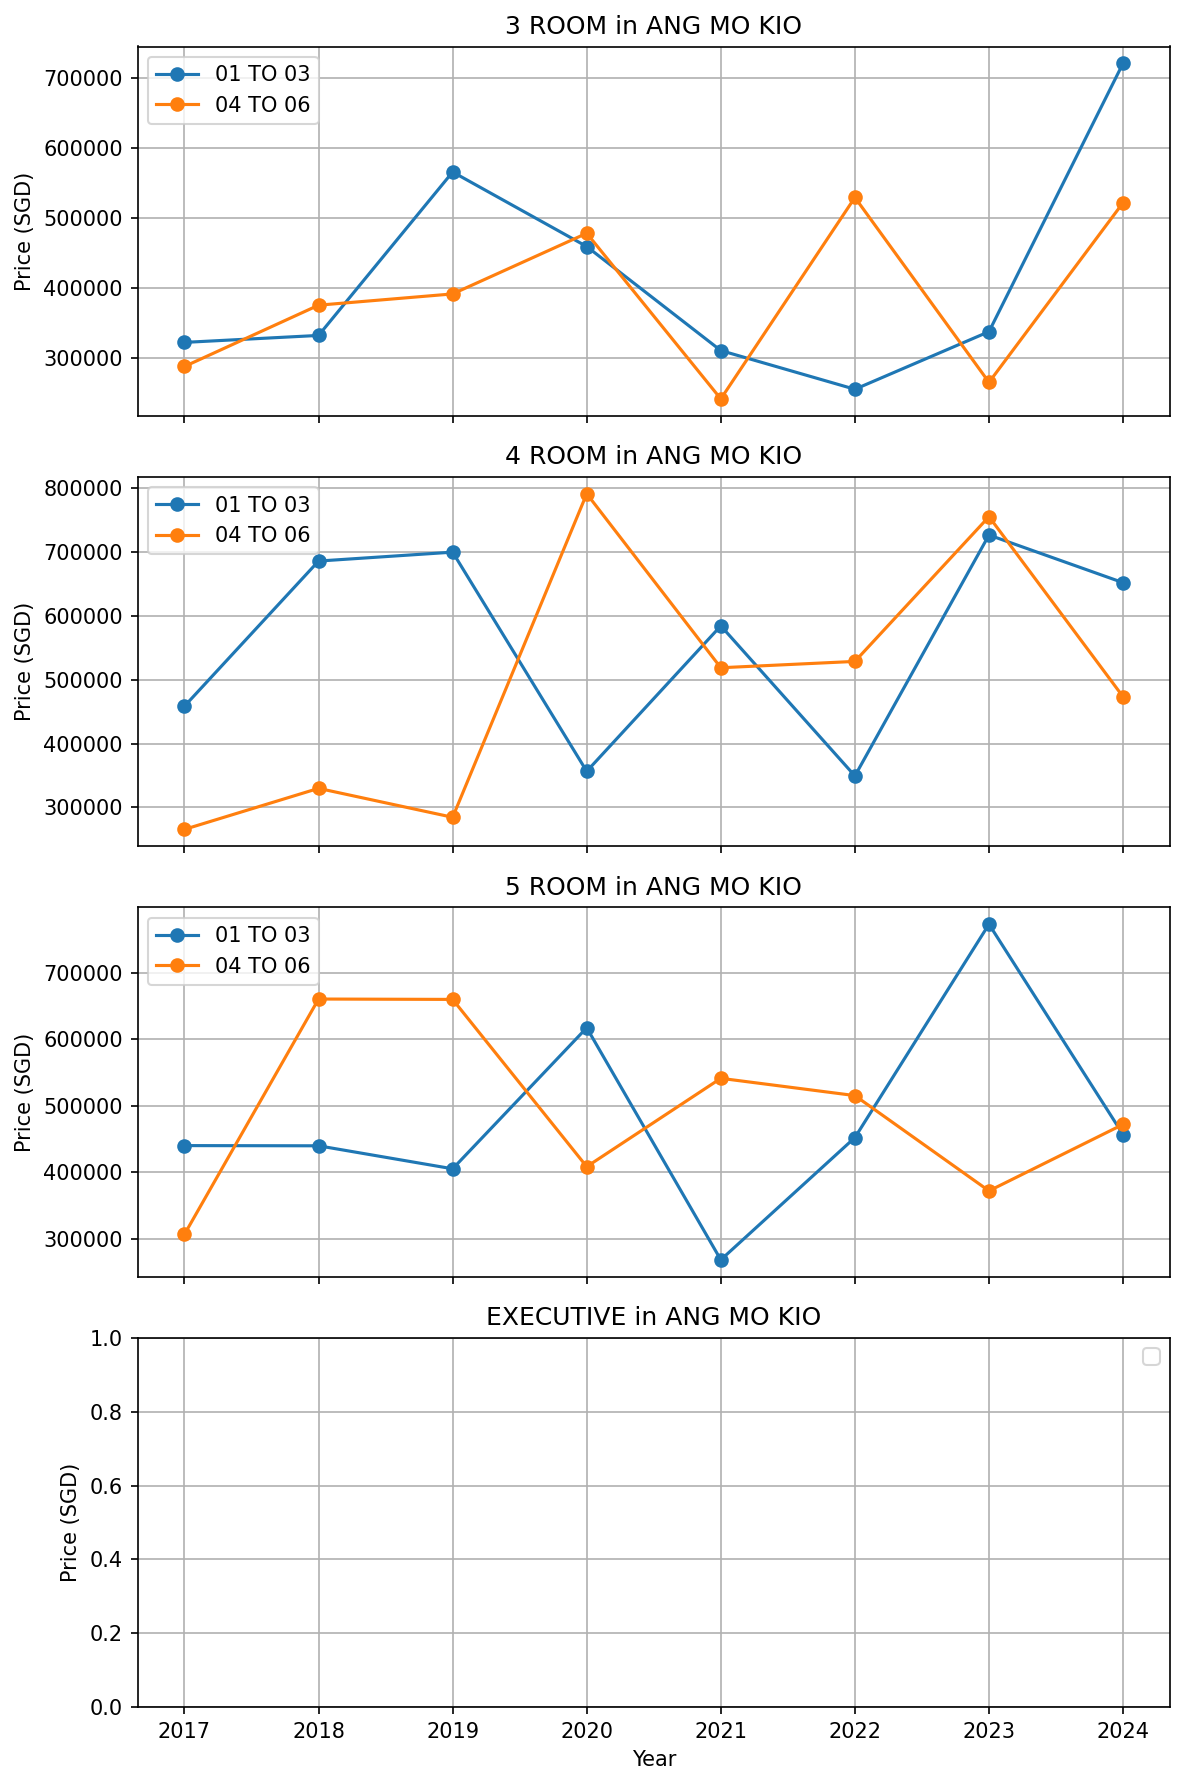

In [24]:
import matplotlib.pyplot as plt

# Variables to compare
town = 'ANG MO KIO'
flat_types = ['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']
storey_ranges = ['01 TO 03', '04 TO 06']  # you can add more

# 1️⃣ Combined Graph (all lines in one chart)
plt.figure(figsize=(8, 5), dpi=150)

for flat_type in flat_types:
    for storey_range in storey_ranges:
        subset = df_pred[
            (df_pred['Town'] == town) &
            (df_pred['Flat Type'] == flat_type) &
            (df_pred['Storey Range'] == storey_range)
        ]
        if not subset.empty:
            plt.plot(
                subset['Year'],
                subset['Predicted Price'],
                marker='o',
                label=f"{flat_type} ({storey_range})"
            )

plt.title(f"Price Trends in {town} by Flat Type & Storey")
plt.xlabel("Year")
plt.ylabel("Predicted Price (SGD)")
plt.grid(True)
plt.legend()
plt.show()


# 2️⃣ Multiple Subplots (each flat type separate)
fig, axes = plt.subplots(len(flat_types), 1, figsize=(8, 12), dpi=150, sharex=True)

for i, flat_type in enumerate(flat_types):
    ax = axes[i]
    for storey_range in storey_ranges:
        subset = df_pred[
            (df_pred['Town'] == town) &
            (df_pred['Flat Type'] == flat_type) &
            (df_pred['Storey Range'] == storey_range)
        ]
        if not subset.empty:
            ax.plot(subset['Year'], subset['Predicted Price'], marker='o', label=storey_range)
    
    ax.set_title(f"{flat_type} in {town}")
    ax.set_ylabel("Price (SGD)")
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()


The second code block focuses on visualizing the predicted price trends from the df_pred DataFrame created earlier. First, the analysis variables are defined, such as the town of interest (ANG MO KIO), a list of flat types including an extra 'EXECUTIVE' category, and a list of storey ranges. It then generates two types of plots.

The first visualization is a combined line chart that plots all selected flat types and storey ranges on one figure. A nested for loop iterates through each combination of flat type and storey range, filtering the DataFrame using boolean conditions. If the subset is not empty, it is plotted with plt.plot, using markers to show each data point. The chart includes a title, axis labels, a grid, and a legend to identify each line.

The second visualization creates multiple subplots, where each flat type is plotted in its own horizontal panel, sharing the same x-axis for easier year-to-year comparison. Again, for each storey range in the flat type, the subset is filtered and plotted with a line graph. Each subplot is labeled with the flat type, includes a y-axis for price, and has a legend for the storey ranges. Finally, plt.tight_layout() is used to avoid overlapping labels, and the last subplot includes the x-axis year label. This dual approach provides both a comprehensive overview in one graph and a focused comparison per flat type in subplots.



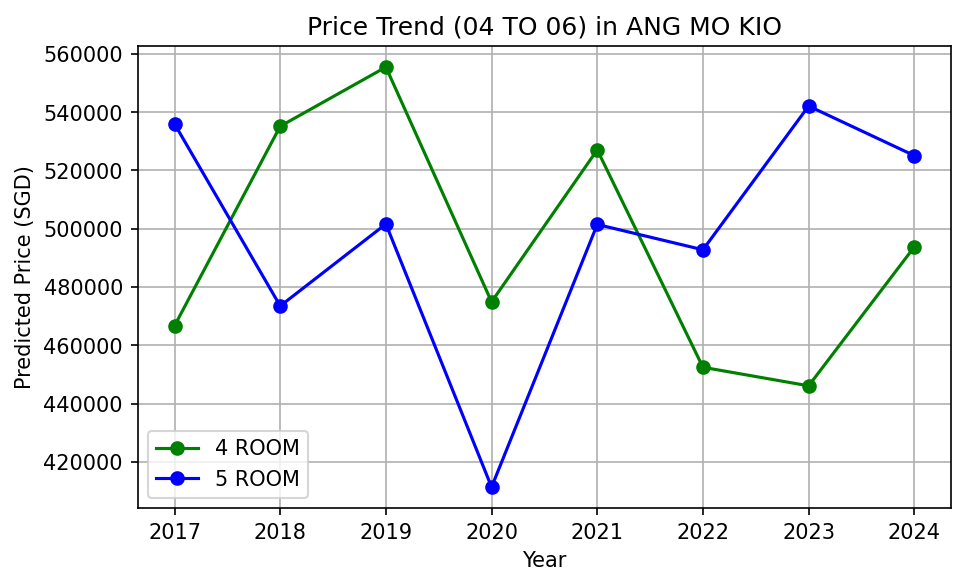

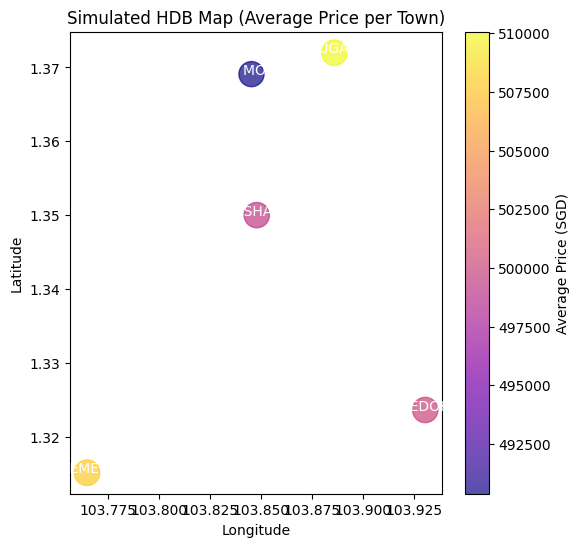

C:\Users\Ethan Gwee E-Rui\AppData\Local\Temp\ipykernel_48156\2001570271.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=map_df.sort_values('Average Price', ascending=True),


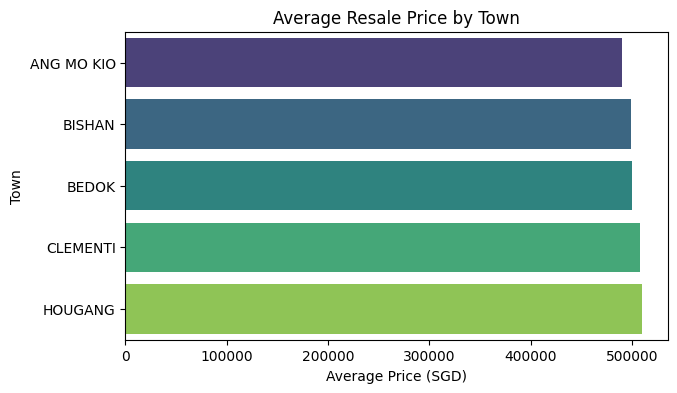

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# ---------------------------
# 1. SIMULATED DATA
# ---------------------------
towns = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'CLEMENTI', 'HOUGANG']
flat_types = ['3 ROOM', '4 ROOM', '5 ROOM']
storey_ranges = ['01 TO 03', '04 TO 06', '07 TO 09']

years = list(range(2017, 2025))
months = list(range(1, 13))

data = []
for town in towns:
    for flat in flat_types:
        for storey in storey_ranges:
            for year in years:
                for month in months:
                    data.append({
                        'Town': town,
                        'Flat Type': flat,
                        'Storey Range': storey,
                        'Year': year,
                        'Month': month,
                        'Predicted Price': np.random.randint(200_000, 800_000)
                    })

df = pd.DataFrame(data)

# ---------------------------
# 2. PRICE PREDICTION TAB (YEARLY TREND)
# ---------------------------
town = 'ANG MO KIO'
flat1, flat2 = '4 ROOM', '5 ROOM'
storey = '04 TO 06'

fig, ax = plt.subplots(figsize=(7, 4), dpi=150)
subset1 = df[(df['Town']==town) & (df['Flat Type']==flat1) & (df['Storey Range']==storey)]
subset1.groupby('Year')['Predicted Price'].mean().plot(marker='o', color='green', ax=ax, label=flat1)

subset2 = df[(df['Town']==town) & (df['Flat Type']==flat2) & (df['Storey Range']==storey)]
subset2.groupby('Year')['Predicted Price'].mean().plot(marker='o', color='blue', ax=ax, label=flat2)

ax.set_title(f"Price Trend ({storey}) in {town}")
ax.set_xlabel("Year")
ax.set_ylabel("Predicted Price (SGD)")
ax.legend()
ax.grid(True)
plt.show()

# ---------------------------
# 3. MAP TAB (MULTIPLE AVERAGE PRICE GRAPHS)
# ---------------------------
# Simulate map coordinates & average prices
map_df = pd.DataFrame({
    'Town': towns,
    'Latitude': [1.3691, 1.3236, 1.3500, 1.3151, 1.3720],
    'Longitude': [103.8454, 103.9305, 103.8480, 103.7649, 103.8860]
})

# Compute average per town
avg_price = df.groupby('Town')['Predicted Price'].mean().reset_index()
map_df = map_df.merge(avg_price, on='Town', how='left')
map_df.rename(columns={'Predicted Price': 'Average Price'}, inplace=True)

# Graph 1: Bubble Map (Scatter)
fig, ax = plt.subplots(figsize=(6,6))
scatter = ax.scatter(
    map_df['Longitude'], map_df['Latitude'],
    s=map_df['Average Price']/1500,
    c=map_df['Average Price'], cmap='plasma', alpha=0.7
)
for i, row in map_df.iterrows():
    ax.text(row['Longitude'], row['Latitude'], row['Town'], color='white', ha='center')
plt.colorbar(scatter, label='Average Price (SGD)')
ax.set_title("Simulated HDB Map (Average Price per Town)")
ax.set_xlabel("Longitude"); ax.set_ylabel("Latitude")
plt.show()

# Graph 2: Horizontal Bar (Average Price by Town)
fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(data=map_df.sort_values('Average Price', ascending=True),
            x='Average Price', y='Town', palette='viridis', ax=ax)
ax.set_title("Average Resale Price by Town")
ax.set_xlabel("Average Price (SGD)")
plt.show()





The third code block presents a more complete simulation of HDB price prediction and visualization, combining yearly trends, map-based insights, and bar charts. It begins by importing libraries and seeding NumPy for reproducibility. The dataset is generated in a nested loop that now includes towns, flat types, storey ranges, years, and months, creating a much finer-grained dataset. Each row of the DataFrame represents a unique month-year combination for a specific flat type in a specific storey range and town, with a random predicted price between 200,000 and 800,000.

The first visualization focuses on a yearly price trend comparison for two flat types (e.g., '4 ROOM' vs '5 ROOM') within the same storey range and town. Instead of raw values, the code uses groupby('Year')['Predicted Price'].mean() to calculate annual average prices, which are then plotted as line graphs with markers on the same axes. This highlights the trend difference between flat types over time.

Next, the code simulates a map-based view. A DataFrame of latitude and longitude coordinates for each town is created and merged with the average predicted price per town, creating a map_df for visualization. Two map-related graphs are generated:

A bubble scatter plot showing each town as a point whose bubble size and color intensity reflect the average price. Labels are overlaid for town names, and a colorbar provides a reference scale for price.

A horizontal bar chart ranking towns by average predicted price, using Seaborn’s barplot with a color palette for visual clarity.

By combining line charts, map-based bubble plots, and bar charts, this third code block demonstrates a multi-perspective analysis approach: tracking temporal price trends, geospatial distribution, and town-level comparisons, giving a comprehensive understanding of the simulated HDB pricing scenario.

# Model Deployment/Prediction

In [26]:
print(list(X_train.columns))


['floor_area_sqm', 'year', 'month_num', 'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION', 'storey_range_01 TO 03', 'storey_range_04 TO 06', 'storey_range_07 TO 09', 'storey_range_10 TO 12', 'storey_range_13 TO 15', 'storey_range_16 TO 18', 'storey_range_19 TO 21', 'storey_range_22 TO 24', 'storey_range_25 TO 27', 'storey_range_28 TO 30', 'storey_range_31 TO 33', 'storey_range_34 TO 36', 'storey_range_37 TO 39', 

This line prints out a list of the column names from the training feature set X_train. It helps you verify which features are being used in the model, ensuring the data is properly prepared and all expected variables are included before training or evaluation.

In [27]:
import pandas as pd

input_dict = {
    'floor_area_sqm': [89.0],
    'year': [2021],
    'month_num': [1],
    'town_ANG MO KIO': [0],
    'town_BEDOK': [1],
    'town_BISHAN': [0],

    'town_BUKIT BATOK': [0],
    'town_BUKIT MERAH': [0],
    'town_BUKIT PANJANG': [0],
    'town_BUKIT TIMAH': [0],
    'town_CENTRAL AREA': [0],
    'town_CHOA CHU KANG': [0],
    'town_CLEMENTI': [0],
    'town_GEYLANG': [0],
    'town_HOUGANG': [0],
    'town_JURONG EAST': [0],
    'town_JURONG WEST': [0],
    'town_KALLANG/WHAMPOA': [0],
    'town_MARINE PARADE': [0],
    'town_PASIR RIS': [0],
    'town_PUNGGOL': [0],
    'town_QUEENSTOWN': [0],
    'town_SEMBAWANG': [0],
    'town_SENGKANG': [0],
    'town_SERANGOON': [0],
    'town_TAMPINES': [0],
    'town_TOA PAYOH': [0],
    'town_WOODLANDS': [0],
    'town_YISHUN': [0],
    'flat_type_1 ROOM': [0],
    'flat_type_2 ROOM': [0],
    'flat_type_3 ROOM': [0],
    'flat_type_4 ROOM': [1],
    'flat_type_5 ROOM': [0],
    'flat_type_EXECUTIVE': [0],
    'flat_type_MULTI-GENERATION': [0],
    'storey_range_01 TO 03': [0],
    'storey_range_04 TO 06': [1],
    'storey_range_07 TO 09': [0],
    'storey_range_10 TO 12': [0],
    'storey_range_13 TO 15': [0],
    'storey_range_16 TO 18': [0],
    'storey_range_19 TO 21': [0],
    'storey_range_22 TO 24': [0],
    'storey_range_25 TO 27': [0],
    'storey_range_28 TO 30': [0],
    'storey_range_31 TO 33': [0],
    'storey_range_34 TO 36': [0],
    'storey_range_37 TO 39': [0],
    'storey_range_40 TO 42': [0],
    'storey_range_43 TO 45': [0],
    'storey_range_46 TO 48': [0],
    'storey_range_49 TO 51': [0],
}

predicted_df = pd.DataFrame(input_dict)

predicted_price = model.predict(predicted_df)[0]
print(f"Predicted resale price: ${predicted_price:,.2f}")


Predicted resale price: $516,388.60


This code snippet creates a single-row DataFrame predicted_df with all the required features already one-hot encoded and numerical columns filled in to represent a specific HDB flat (e.g., 89 sqm, year 2021, January, in BEDOK, 4-room flat, storey range 04 TO 06). It then uses your trained model to predict the resale price for this configuration and prints the result formatted as a currency value.

In [ ]:
import joblib

# After RandomizedSearchCV
best_model = random_search.best_estimator_

# Save the tuned model
joblib.dump(best_model, "resale_model.pkl")
print("✅ Tuned Random Forest model saved as resale_model.pkl")


✅ Tuned Random Forest model saved as resale_model.pkl


to run the py code use python -m streamlit run proj.py


GRIDSEARCHCV

When applying GridSearchCV to tune hyperparameters, I observed that the accuracy (or R²) value decreased instead of improving compared to the baseline model.
What I learned:
Hyperparameter tuning is not guaranteed to always improve performance and requires careful setup.It’s important to validate tuned models on an independent test set to confirm true improvements.Further tuning with refined parameters or alternative methods (like randomized search or Bayesian optimization) may be needed.

Before use of GridsearchCV, R2 value 0.8828
After use of girdsearchCV, R2 value 0.8822

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [None, 10, 20, 30],       # Depth of trees
    'min_samples_split': [2, 5, 10],       # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Min samples at leaf node
    'max_features': ['auto', 'sqrt']       # Features considered for split
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',           # Use R² as scoring metric
    cv=3,                   # 3-fold cross validation
    n_jobs=-1,              # Use all CPU cores
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters for RandomForestRegressor:", grid_search.best_params_)
print("Best R² score from CV:", grid_search.best_score_)

# Use best estimator to predict test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate on test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTest Set Performance (Best RF): RMSE = {rmse:.2f}, MAE = {mae:.2f}, R² = {r2:.4f}")
